✅ Biblioteki załadowane
📡 Wczytywanie danych z DigitalOcean Spaces...
✅ Dane wczytane:
   - 2023: 8950 wierszy
   - 2024: 13007 wierszy
🧹 Czyszczenie danych...
Przed filtrowaniem: 8950 wierszy
Po usunięciu DNF/DNS: 8150 wierszy
Usunięto 0 outlierów z kolumny 'Tempo'
Po oczyszczeniu: 7914 wierszy
Usunięto: 1036 wierszy (11.58%)
Przed filtrowaniem: 13007 wierszy
Po usunięciu DNF/DNS: 10300 wierszy
Usunięto 0 outlierów z kolumny 'Tempo'
Po oczyszczeniu: 9995 wierszy
Usunięto: 3012 wierszy (23.16%)
✅ Połączono: 17909 wierszy
📊 Dataset: 17878 wierszy, 6 feature'ów
Feature'y: ['Gender_Numeric', 'Wiek', '5 km Tempo', 'Tempo Stabilność', 'Has_Team', 'First_5km_Fast']

📊 ANALIZA: Has_Team vs Tempo

📈 Statystyki tempo według przynależności do drużyny:
          Tempo_mean  Tempo_median  Tempo_std  Tempo_count  Tempo_min  \
Has_Team                                                                
0             5.9399        5.8205     0.9371        10834     3.0363   
1             5.6849        5

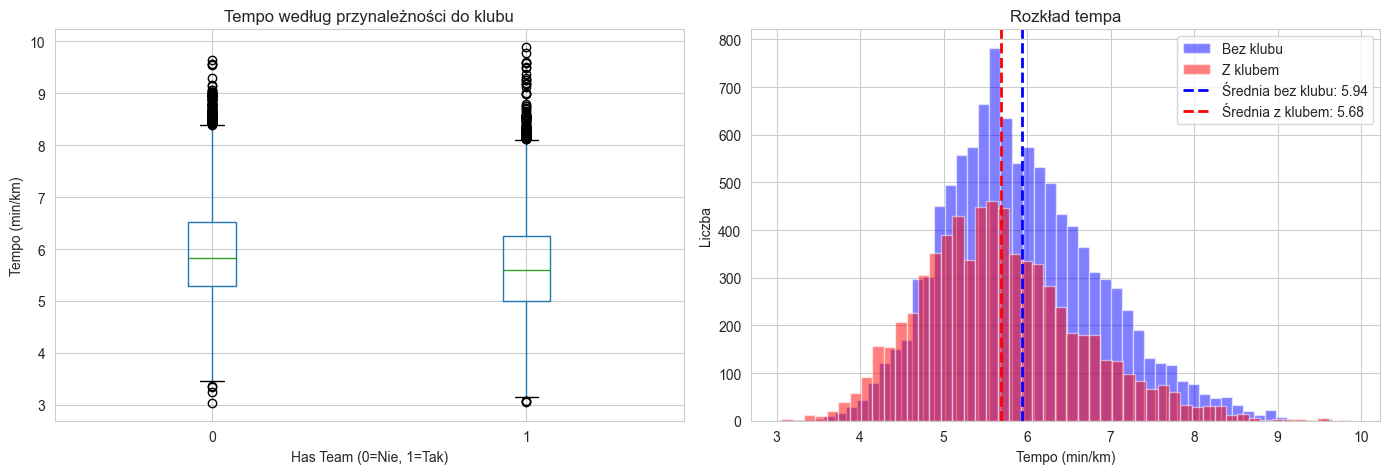


📊 ANALIZA: Korelacje między feature'ami

📈 Macierz korelacji:
                  Gender_Numeric   Wiek  5 km Tempo  Tempo Stabilność  \
Gender_Numeric             1.000  0.079      -0.340            -0.048   
Wiek                       0.079  1.000       0.056             0.034   
5 km Tempo                -0.340  0.056       1.000             0.241   
Tempo Stabilność          -0.048  0.034       0.241             1.000   
Has_Team                   0.067  0.179      -0.143            -0.029   
First_5km_Fast             0.302 -0.037      -0.786            -0.222   
Tempo                     -0.315  0.065       0.938             0.543   

                  Has_Team  First_5km_Fast  Tempo  
Gender_Numeric       0.067           0.302 -0.315  
Wiek                 0.179          -0.037  0.065  
5 km Tempo          -0.143          -0.786  0.938  
Tempo Stabilność    -0.029          -0.222  0.543  
Has_Team             1.000           0.115 -0.130  
First_5km_Fast       0.115           1.0

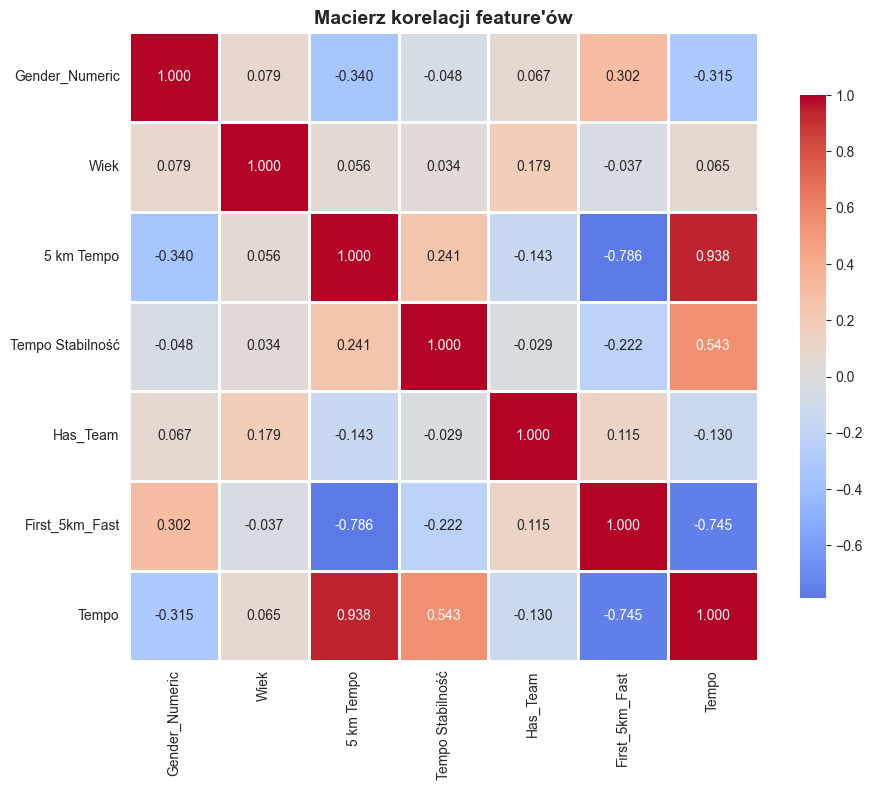


⚠️  Potencjalna MULTICOLLINEARITY (korelacja między feature'ami > 0.7):
   5 km Tempo <-> First_5km_Fast: -0.786

📊 ANALIZA: Feature Importance (Random Forest)

📈 Feature Importance (sortowane malejąco):
         Feature  Importance
      5 km Tempo    0.877163
Tempo Stabilność    0.119255
            Wiek    0.002704
        Has_Team    0.000421
  Gender_Numeric    0.000344
  First_5km_Fast    0.000113


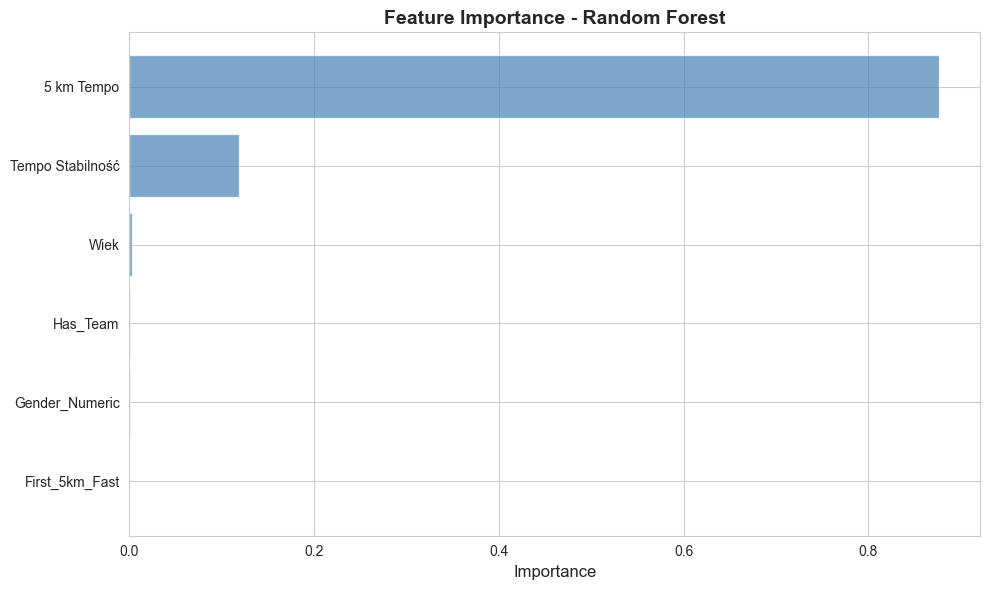


💡 Interpretacja:
   5 km Tempo: 87.7% - ⭐ BARDZO WAŻNY
   Tempo Stabilność: 11.9% - ⚠️  ŚREDNIO WAŻNY
   Wiek: 0.3% - ❌ MAŁO WAŻNY (można usunąć)
   Has_Team: 0.0% - ❌ MAŁO WAŻNY (można usunąć)
   Gender_Numeric: 0.0% - ❌ MAŁO WAŻNY (można usunąć)
   First_5km_Fast: 0.0% - ❌ MAŁO WAŻNY (można usunąć)

📊 ANALIZA: Permutation Importance (bardziej wiarygodna)

📈 Permutation Importance:
         Feature  Importance_Mean  Importance_Std
      5 km Tempo         1.454034        0.031552
Tempo Stabilność         0.209927        0.004489
            Wiek         0.000447        0.000253
  First_5km_Fast         0.000138        0.000031
        Has_Team         0.000130        0.000052
  Gender_Numeric        -0.000003        0.000035


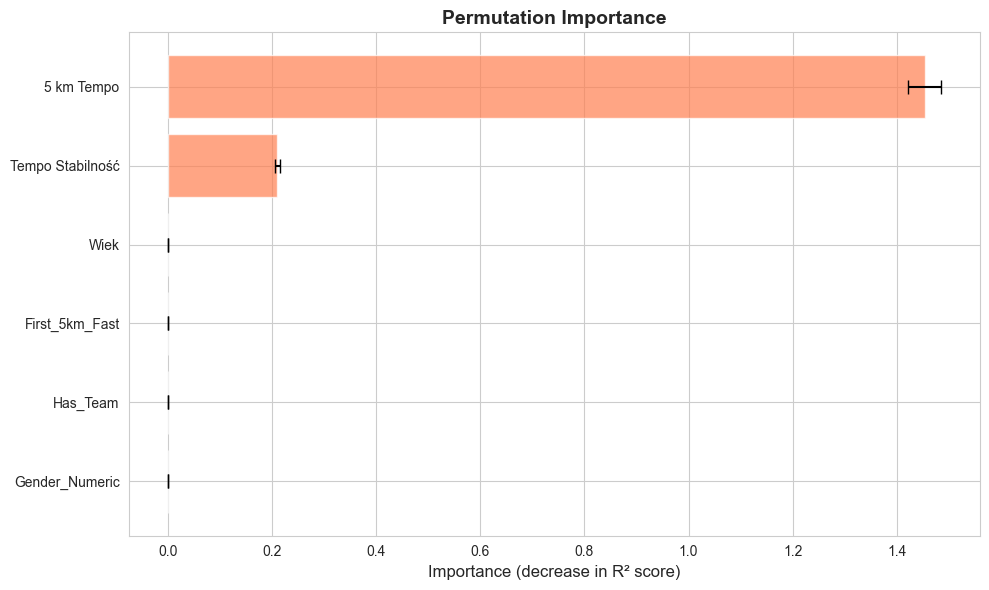


💡 Jeśli Permutation Importance < 0.001 → feature można usunąć!

🧪 EKSPERYMENT: Model BEZ Has_Team

📊 PORÓWNANIE MODELI:

Metryka    Z Has_Team      Bez Has_Team    Różnica         % zmiana       
---------------------------------------------------------------------------
MAE        0.0694          0.0698          0.0004          0.54           %
RMSE       0.1051          0.1057          0.0006          0.54           %
R²         0.9881          0.9880          -0.0001         -0.01          %

💡 WNIOSKI:
   ✅ Has_Team ma MINIMALNY wpływ (różnica < 1%)
   ✅ REKOMENDACJA: USUŃ Has_Team - upraszcza model bez straty jakości

📊 ANALIZA: Automatyczna selekcja feature'ów

🔬 Metoda 1: SelectKBest (F-statistic)
         Feature       F_Score      P_Value
      5 km Tempo 130703.308917 0.000000e+00
  First_5km_Fast  22343.259450 0.000000e+00
Tempo Stabilność   7488.444929 0.000000e+00
  Gender_Numeric   1970.044030 0.000000e+00
        Has_Team    308.904370 1.427544e-68
            Wiek     

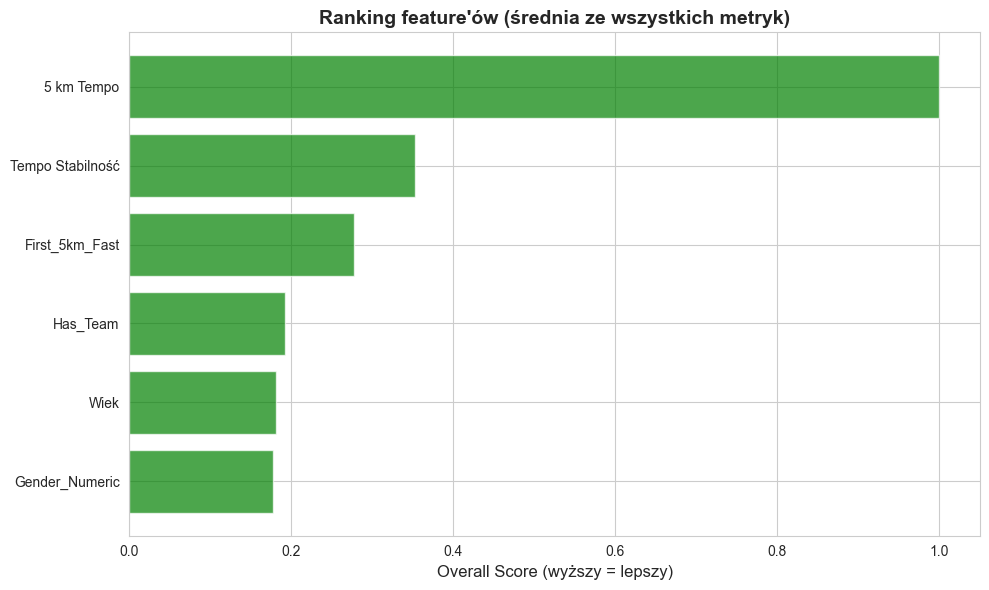


💡 TOP 3 najważniejsze feature'y:
   1. 5 km Tempo: 1.000
   2. Tempo Stabilność: 0.353
   3. First_5km_Fast: 0.277

⚠️  Feature'y do rozważenia usunięcia (score < 0.3):
   - First_5km_Fast: 0.277
   - Has_Team: 0.192
   - Wiek: 0.181
   - Gender_Numeric: 0.177

✅ Analiza zakończona!
💡 Możesz teraz zdecydować które feature'y zachować w finalnym modelu.


In [1]:
# %% [markdown]
# # 🔬 Model Analysis - Analiza Feature'ów i Modelu
# 
# Ten notebook analizuje:
# 1. Czy wszystkie feature'y są potrzebne?
# 2. Jakie mają znaczenie statystyczne?
# 3. Czy są redundantne?
# 4. Jak można zoptymalizować model?

# %% [markdown]
## 1. Import bibliotek i wczytanie danych

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE, mutual_info_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import joblib
import boto3
from dotenv import load_dotenv
import os
import sys

# Dodanie ścieżki do modułów utils
sys.path.append('..')
from utils.data_preprocessing import clean_data_for_modeling

# Konfiguracja
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
pd.set_option('display.max_columns', None)
load_dotenv()

print("✅ Biblioteki załadowane")

# %% [markdown]
## 2. Wczytanie danych

# %%
BUCKET_NAME = "dane-modul9"

s3_client = boto3.client(
    "s3",
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    endpoint_url=os.getenv("AWS_ENDPOINT_URL_S3")
)

print("📡 Wczytywanie danych z DigitalOcean Spaces...")

wroclaw_2023_df = pd.read_csv(
    f"s3://{BUCKET_NAME}/dane-zadanie_modul9/halfmarathon_wroclaw_2023__final.csv", 
    sep=";"
)
wroclaw_2024_df = pd.read_csv(
    f"s3://{BUCKET_NAME}/dane-zadanie_modul9/halfmarathon_wroclaw_2024__final.csv", 
    sep=";"
)

print(f"✅ Dane wczytane:")
print(f"   - 2023: {len(wroclaw_2023_df)} wierszy")
print(f"   - 2024: {len(wroclaw_2024_df)} wierszy")

# %% [markdown]
## 3. Czyszczenie danych

# %%
print("🧹 Czyszczenie danych...")
df_2023_clean = clean_data_for_modeling(wroclaw_2023_df, 2023)
df_2024_clean = clean_data_for_modeling(wroclaw_2024_df, 2024)

df_combined = pd.concat([df_2023_clean, df_2024_clean], ignore_index=True)
print(f"✅ Połączono: {len(df_combined)} wierszy")

# %% [markdown]
## 4. Przygotowanie danych do analizy

# %%
feature_columns = [
    'Gender_Numeric',
    'Wiek',
    '5 km Tempo',
    'Tempo Stabilność',
    'Has_Team',
    'First_5km_Fast'
]

target_column = 'Tempo'

# Usunięcie brakujących wartości
df_model = df_combined[feature_columns + [target_column]].dropna()

X = df_model[feature_columns]
y = df_model[target_column]

print(f"📊 Dataset: {len(df_model)} wierszy, {len(feature_columns)} feature'ów")
print(f"Feature'y: {feature_columns}")

# %% [markdown]
## 5. ANALIZA #1: Czy "Has_Team" ma wpływ statystyczny?

# %%
print("\n" + "="*80)
print("📊 ANALIZA: Has_Team vs Tempo")
print("="*80)

# Statystyki opisowe
has_team_stats = df_model.groupby('Has_Team').agg({
    'Tempo': ['mean', 'median', 'std', 'count', 'min', 'max']
}).round(4)

has_team_stats.columns = ['_'.join(col).strip() for col in has_team_stats.columns.values]
print("\n📈 Statystyki tempo według przynależności do drużyny:")
print(has_team_stats)

# Test t-Studenta
with_team = df_model[df_model['Has_Team'] == 1]['Tempo'].dropna()
without_team = df_model[df_model['Has_Team'] == 0]['Tempo'].dropna()

t_stat, p_value = stats.ttest_ind(with_team, without_team)

print(f"\n🔬 Test t-Studenta (czy różnica jest istotna statystycznie):")
print(f"   Grupa Z klubem:    n={len(with_team)}, średnie tempo={with_team.mean():.4f} min/km")
print(f"   Grupa BEZ klubu:   n={len(without_team)}, średnie tempo={without_team.mean():.4f} min/km")
print(f"   t-statistic: {t_stat:.4f}")
print(f"   p-value: {p_value:.6f}")

if p_value < 0.001:
    print("   ✅ BARDZO ISTOTNA statystycznie różnica (p < 0.001)")
elif p_value < 0.01:
    print("   ✅ ISTOTNA statystycznie różnica (p < 0.01)")
elif p_value < 0.05:
    print("   ⚠️  SŁABO istotna różnica (p < 0.05)")
else:
    print("   ❌ BRAK istotnej różnicy statystycznej (p >= 0.05)")

# Różnica praktyczna
diff_tempo = with_team.mean() - without_team.mean()
diff_time_total = diff_tempo * 21.0975  # minuty na całym biegu

print(f"\n⏱️  Praktyczna różnica:")
print(f"   Tempo: {diff_tempo:.4f} min/km ({abs(diff_tempo):.4f} min/km szybciej)")
print(f"   Na całym półmaratonie: {diff_time_total:.2f} minut")

if abs(diff_time_total) < 2:
    print("   💡 To mniej niż 2 minuty - MAŁA praktyczna różnica")
elif abs(diff_time_total) < 5:
    print("   💡 To 2-5 minut - ŚREDNIA praktyczna różnica")
else:
    print("   💡 To ponad 5 minut - DUŻA praktyczna różnica")

# Wykres
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df_model.boxplot(column='Tempo', by='Has_Team', ax=axes[0])
axes[0].set_xlabel('Has Team (0=Nie, 1=Tak)')
axes[0].set_ylabel('Tempo (min/km)')
axes[0].set_title('Tempo według przynależności do klubu')
axes[0].get_figure().suptitle('')

# Histogram
axes[1].hist(without_team, bins=50, alpha=0.5, label='Bez klubu', color='blue')
axes[1].hist(with_team, bins=50, alpha=0.5, label='Z klubem', color='red')
axes[1].axvline(without_team.mean(), color='blue', linestyle='--', linewidth=2, label=f'Średnia bez klubu: {without_team.mean():.2f}')
axes[1].axvline(with_team.mean(), color='red', linestyle='--', linewidth=2, label=f'Średnia z klubem: {with_team.mean():.2f}')
axes[1].set_xlabel('Tempo (min/km)')
axes[1].set_ylabel('Liczba')
axes[1].set_title('Rozkład tempa')
axes[1].legend()

plt.tight_layout()
plt.show()

# %% [markdown]
## 6. ANALIZA #2: Korelacja między feature'ami

# %%
print("\n" + "="*80)
print("📊 ANALIZA: Korelacje między feature'ami")
print("="*80)

# Macierz korelacji
correlation_matrix = df_model[feature_columns + [target_column]].corr()

print("\n📈 Macierz korelacji:")
print(correlation_matrix.round(3))

# Korelacje z targetem
target_correlations = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)
print(f"\n🎯 Korelacje z targetem (Tempo):")
for feature, corr in target_correlations.items():
    strength = "SILNA" if abs(corr) > 0.7 else "ŚREDNIA" if abs(corr) > 0.3 else "SŁABA"
    print(f"   {feature:<20}: {corr:>7.4f}  ({strength})")

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Macierz korelacji feature\'ów', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Sprawdź multicollinearity
print("\n⚠️  Potencjalna MULTICOLLINEARITY (korelacja między feature'ami > 0.7):")
high_corr_found = False
for i in range(len(feature_columns)):
    for j in range(i+1, len(feature_columns)):
        corr_val = correlation_matrix.loc[feature_columns[i], feature_columns[j]]
        if abs(corr_val) > 0.7:
            print(f"   {feature_columns[i]} <-> {feature_columns[j]}: {corr_val:.3f}")
            high_corr_found = True

if not high_corr_found:
    print("   ✅ Brak silnych korelacji między feature'ami")

# %% [markdown]
## 7. ANALIZA #3: Feature Importance (Random Forest)

# %%
print("\n" + "="*80)
print("📊 ANALIZA: Feature Importance (Random Forest)")
print("="*80)

# Split danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trenuj Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📈 Feature Importance (sortowane malejąco):")
print(feature_importance.to_string(index=False))

# Wykres
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', alpha=0.7)
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Interpretacja
print("\n💡 Interpretacja:")
for idx, row in feature_importance.iterrows():
    pct = row['Importance'] * 100
    if pct > 30:
        print(f"   {row['Feature']}: {pct:.1f}% - ⭐ BARDZO WAŻNY")
    elif pct > 15:
        print(f"   {row['Feature']}: {pct:.1f}% - ✅ WAŻNY")
    elif pct > 5:
        print(f"   {row['Feature']}: {pct:.1f}% - ⚠️  ŚREDNIO WAŻNY")
    else:
        print(f"   {row['Feature']}: {pct:.1f}% - ❌ MAŁO WAŻNY (można usunąć)")

# %% [markdown]
## 8. ANALIZA #4: Permutation Importance

# %%
print("\n" + "="*80)
print("📊 ANALIZA: Permutation Importance (bardziej wiarygodna)")
print("="*80)

# Oblicz permutation importance
perm_importance = permutation_importance(
    rf_model, X_test, y_test, 
    n_repeats=10, random_state=42, n_jobs=-1
)

perm_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=False)

print("\n📈 Permutation Importance:")
print(perm_importance_df.to_string(index=False))

# Wykres z error bars
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance_Mean'], 
         xerr=perm_importance_df['Importance_Std'], color='coral', alpha=0.7, capsize=5)
plt.xlabel('Importance (decrease in R² score)', fontsize=12)
plt.title('Permutation Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 Jeśli Permutation Importance < 0.001 → feature można usunąć!")

# %% [markdown]
## 9. ANALIZA #5: Eksperyment - Model bez Has_Team

# %%
print("\n" + "="*80)
print("🧪 EKSPERYMENT: Model BEZ Has_Team")
print("="*80)

# Feature'y bez Has_Team
features_no_team = [f for f in feature_columns if f != 'Has_Team']
X_no_team = df_model[features_no_team]

X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(
    X_no_team, y, test_size=0.2, random_state=42
)

# Trenuj model bez Has_Team
rf_no_team = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_no_team.fit(X_train_nt, y_train_nt)

# Predykcje
y_pred_with = rf_model.predict(X_test)
y_pred_without = rf_no_team.predict(X_test_nt)

# Metryki
metrics_with = {
    'MAE': mean_absolute_error(y_test, y_pred_with),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_with)),
    'R²': r2_score(y_test, y_pred_with)
}

metrics_without = {
    'MAE': mean_absolute_error(y_test_nt, y_pred_without),
    'RMSE': np.sqrt(mean_squared_error(y_test_nt, y_pred_without)),
    'R²': r2_score(y_test_nt, y_pred_without)
}

# Porównanie
print("\n📊 PORÓWNANIE MODELI:")
print(f"\n{'Metryka':<10} {'Z Has_Team':<15} {'Bez Has_Team':<15} {'Różnica':<15} {'% zmiana':<15}")
print("-" * 75)

for metric in ['MAE', 'RMSE', 'R²']:
    with_val = metrics_with[metric]
    without_val = metrics_without[metric]
    diff = without_val - with_val
    pct_change = (diff / with_val) * 100 if with_val != 0 else 0
    
    print(f"{metric:<10} {with_val:<15.4f} {without_val:<15.4f} {diff:<15.4f} {pct_change:<15.2f}%")

# Wnioski
print("\n💡 WNIOSKI:")
mae_diff = abs(metrics_without['MAE'] - metrics_with['MAE'])
r2_diff = abs(metrics_without['R²'] - metrics_with['R²'])

if mae_diff < 0.01 and r2_diff < 0.01:
    print("   ✅ Has_Team ma MINIMALNY wpływ (różnica < 1%)")
    print("   ✅ REKOMENDACJA: USUŃ Has_Team - upraszcza model bez straty jakości")
elif mae_diff < 0.05 and r2_diff < 0.03:
    print("   ⚠️  Has_Team ma MAŁY wpływ (różnica 1-3%)")
    print("   ⚠️  REKOMENDACJA: Możesz usunąć dla prostoty lub zachować")
else:
    print("   ❌ Has_Team ma ISTOTNY wpływ (różnica > 3%)")
    print("   ❌ REKOMENDACJA: ZACHOWAJ Has_Team w modelu")

# %% [markdown]
## 10. ANALIZA #6: Automatyczna selekcja feature'ów

# %%
print("\n" + "="*80)
print("📊 ANALIZA: Automatyczna selekcja feature'ów")
print("="*80)

# Metoda 1: SelectKBest (F-test)
print("\n🔬 Metoda 1: SelectKBest (F-statistic)")
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X, y)

f_scores = pd.DataFrame({
    'Feature': feature_columns,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)

print(f_scores.to_string(index=False))

# Metoda 2: Mutual Information
print("\n🔬 Metoda 2: Mutual Information")
mi_scores = mutual_info_regression(X, y, random_state=42)

mi_df = pd.DataFrame({
    'Feature': feature_columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print(mi_df.to_string(index=False))

# Metoda 3: RFE (Recursive Feature Elimination)
print("\n🔬 Metoda 3: RFE (Recursive Feature Elimination)")
rfe = RFE(estimator=RandomForestRegressor(n_estimators=50, random_state=42), n_features_to_select=4)
rfe.fit(X, y)

rfe_df = pd.DataFrame({
    'Feature': feature_columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print(rfe_df.to_string(index=False))

selected_features_rfe = rfe_df[rfe_df['Selected']]['Feature'].tolist()
print(f"\n✅ RFE wybrało {len(selected_features_rfe)} najlepszych feature'ów:")
print(f"   {selected_features_rfe}")

# %% [markdown]
## 11. PODSUMOWANIE I REKOMENDACJE

# %%
print("\n" + "="*80)
print("📋 PODSUMOWANIE I REKOMENDACJE")
print("="*80)

print("\n🎯 Feature: Has_Team")
print("-" * 40)

# Podsumowanie wszystkich analiz
has_team_importance = feature_importance[feature_importance['Feature'] == 'Has_Team']['Importance'].values[0]
has_team_perm = perm_importance_df[perm_importance_df['Feature'] == 'Has_Team']['Importance_Mean'].values[0]
has_team_selected_rfe = 'Has_Team' in selected_features_rfe

print(f"1. Test statystyczny (t-test): p-value = {p_value:.6f}")
print(f"   → {'Istotne' if p_value < 0.05 else 'Nieistotne'} statystycznie")

print(f"\n2. Praktyczna różnica: {abs(diff_time_total):.2f} minut na półmaraton")
print(f"   → {'Znacząca' if abs(diff_time_total) > 2 else 'Niewielka'} różnica praktyczna")

print(f"\n3. Feature Importance (RF): {has_team_importance*100:.2f}%")
print(f"   → {'Ważny' if has_team_importance > 0.10 else 'Mało ważny'} feature")

print(f"\n4. Permutation Importance: {has_team_perm:.6f}")
print(f"   → {'Znaczący' if has_team_perm > 0.001 else 'Nieznaczący'} wpływ na predykcję")

print(f"\n5. RFE: {'Wybrany' if has_team_selected_rfe else 'Odrzucony'}")

print(f"\n6. Model bez Has_Team: MAE różni się o {mae_diff:.4f}")
print(f"   → {'Można usunąć' if mae_diff < 0.01 else 'Lepiej zachować'}")

# Finalna rekomendacja
score = 0
if p_value < 0.05: score += 1
if abs(diff_time_total) > 2: score += 1
if has_team_importance > 0.10: score += 1
if has_team_perm > 0.001: score += 1
if has_team_selected_rfe: score += 1
if mae_diff > 0.01: score += 1

print(f"\n{'='*40}")
print(f"SCORE: {score}/6")

if score >= 4:
    print("🏆 FINALNA REKOMENDACJA: ZACHOWAJ Has_Team")
    print("   → Feature ma znaczący wpływ na predykcję")
elif score >= 2:
    print("⚠️  FINALNA REKOMENDACJA: OPCJONALNE")
    print("   → Feature ma umiarkowany wpływ, decyzja zależy od kontekstu")
else:
    print("❌ FINALNA REKOMENDACJA: USUŃ Has_Team")
    print("   → Feature ma minimalny wpływ, można uprościć model")

print(f"{'='*40}\n")

# %% [markdown]
## 12. Ranking wszystkich feature'ów

# %%
print("\n" + "="*80)
print("🏆 RANKING WSZYSTKICH FEATURE'ÓW")
print("="*80)

# Zbierz wszystkie metryki
ranking_df = pd.DataFrame({
    'Feature': feature_columns,
    'RF_Importance': rf_model.feature_importances_,
    'Perm_Importance': perm_importance.importances_mean,
    'F_Score': selector_f.scores_,
    'MI_Score': mi_scores,
    'RFE_Ranking': rfe.ranking_,
    'Target_Correlation': [abs(correlation_matrix.loc[f, target_column]) for f in feature_columns]
})

# Normalizuj metryki do 0-1
for col in ['RF_Importance', 'Perm_Importance', 'F_Score', 'MI_Score', 'Target_Correlation']:
    max_val = ranking_df[col].max()
    if max_val > 0:
        ranking_df[f'{col}_Norm'] = ranking_df[col] / max_val

# RFE - niższy ranking = lepszy, więc odwróć
max_rank = ranking_df['RFE_Ranking'].max()
ranking_df['RFE_Ranking_Norm'] = (max_rank - ranking_df['RFE_Ranking'] + 1) / max_rank

# Średnia wszystkich znormalizowanych metryk
norm_cols = [col for col in ranking_df.columns if col.endswith('_Norm')]
ranking_df['Overall_Score'] = ranking_df[norm_cols].mean(axis=1)

# Sortuj po overall score
ranking_final = ranking_df[['Feature', 'Overall_Score']].sort_values('Overall_Score', ascending=False)
ranking_final['Rank'] = range(1, len(ranking_final) + 1)

print("\n📊 Ranking (średnia ze wszystkich metryk):")
print(ranking_final[['Rank', 'Feature', 'Overall_Score']].to_string(index=False))

# Wykres
plt.figure(figsize=(10, 6))
plt.barh(ranking_final['Feature'], ranking_final['Overall_Score'], color='green', alpha=0.7)
plt.xlabel('Overall Score (wyższy = lepszy)', fontsize=12)
plt.title('Ranking feature\'ów (średnia ze wszystkich metryk)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 TOP 3 najważniejsze feature'y:")
for idx, row in ranking_final.head(3).iterrows():
    print(f"   {int(row['Rank'])}. {row['Feature']}: {row['Overall_Score']:.3f}")

print("\n⚠️  Feature'y do rozważenia usunięcia (score < 0.3):")
low_score = ranking_final[ranking_final['Overall_Score'] < 0.3]
if len(low_score) > 0:
    for idx, row in low_score.iterrows():
        print(f"   - {row['Feature']}: {row['Overall_Score']:.3f}")
else:
    print("   ✅ Wszystkie feature'y mają dobry score!")

# %%
print("\n✅ Analiza zakończona!")
print("💡 Możesz teraz zdecydować które feature'y zachować w finalnym modelu.")